In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import os

In [25]:
df = pd.read_csv("./data/bmi_500.csv", index_col='Label')

In [28]:
df

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [32]:
# index 중복제거
df.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

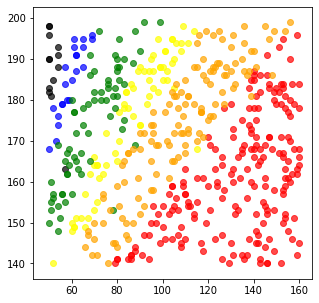

In [52]:
# 3진 아웃제도 ? 좋은거같음 프로그램 간단하게만들기 위해.. 함수화를 하자

plt.figure(figsize=(5,5))

def make_scatter(label, color):
    t = df.loc[label]
    plt.scatter(t['Weight'], t['Height'], c = color, label=label, alpha=0.7)

make_scatter('Extremely Weak', 'black')
make_scatter('Weak', 'blue')
make_scatter('Extreme Obesity', 'red')
make_scatter('Overweight', 'yellow')
make_scatter('Normal', 'green')
make_scatter('Obesity', 'orange')

# plt.legend(loc='upper right')
plt.show()

In [54]:
df = pd.read_csv("./data/bmi_500.csv")
df

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [61]:
X = df.loc[:,['Height', 'Weight']]
y = df.loc[:,['Label']]

print(X.shape)
print(y.shape)

(500, 2)
(500, 1)


In [70]:
 X.shape[0] * 0.8

400.0

In [81]:
l = int(X.shape[0] * 0.8)
train_X = X.iloc[:l,:]
test_X = X.iloc[l:,:]
train_y = y.iloc[:l,:]
test_y = y.iloc[l:,:]

In [92]:
model = KNeighborsClassifier(n_neighbors=17)
model.fit(train_X, train_y)
pre = model.predict(test_X)

metrics.accuracy_score(pre, test_y)

C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.95

In [96]:
model.predict([[150,20], [170,75]])

array(['Normal', 'Overweight'], dtype=object)